In [2]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.metrics import mean_squared_error, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("train.csv")
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [5]:
df.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [6]:
df.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [7]:
df.duplicated().sum()

0

<AxesSubplot:>

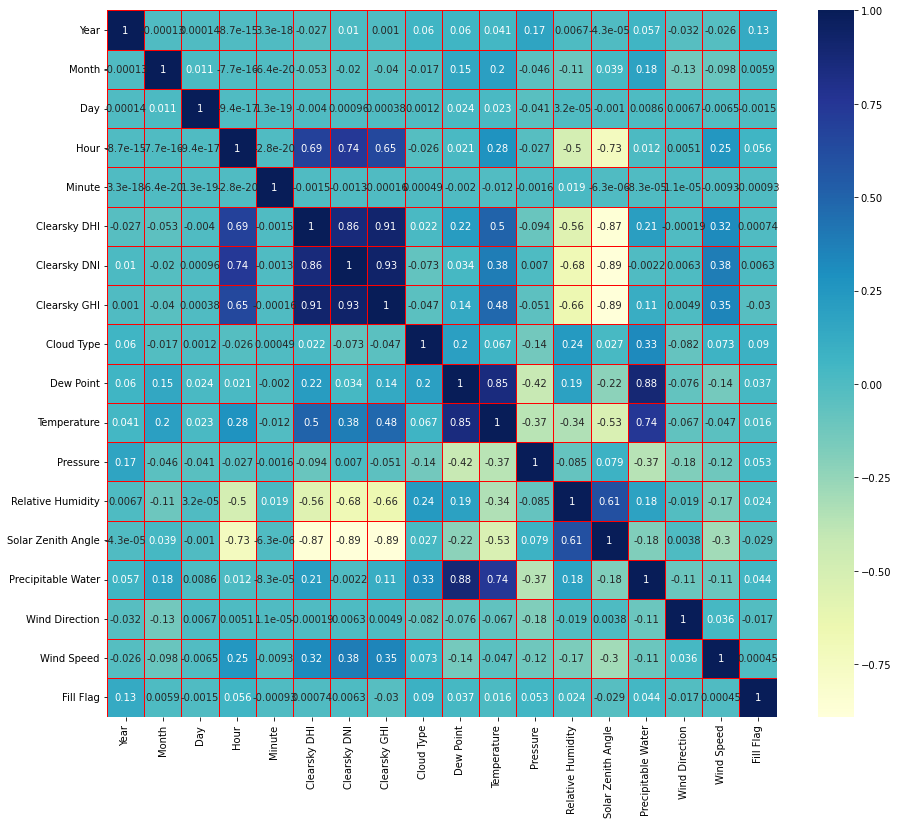

In [8]:
plt.figure(figsize= (15,13))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True, linewidth= 1, linecolor= 'red' )

In [9]:
def plot_relation(col_name_x, col_name_y, df):
    plt.figure(figsize=(15,10))
    sns.barplot(x= col_name_x, y= col_name_y, data=df)

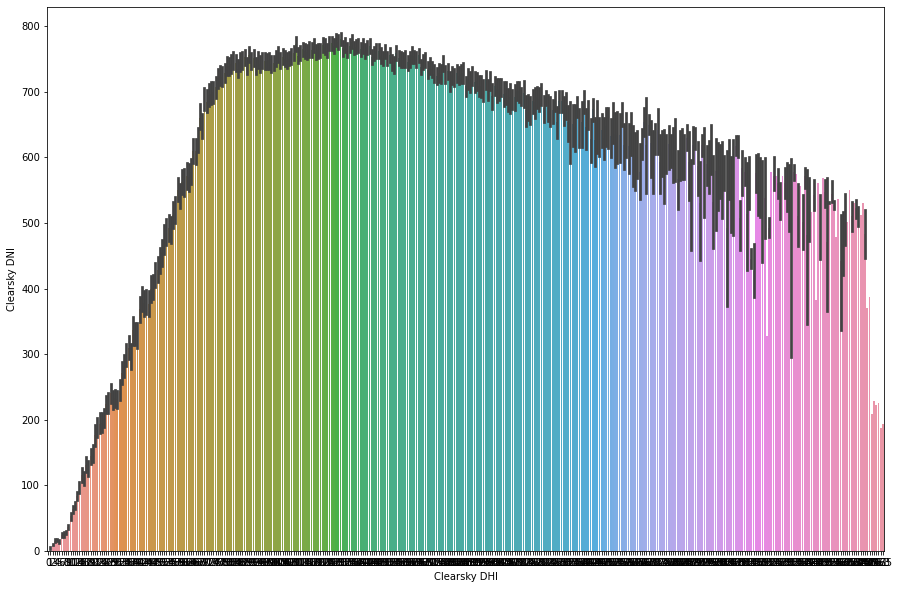

In [10]:
plot_relation('Clearsky DHI', 'Clearsky DNI', df)

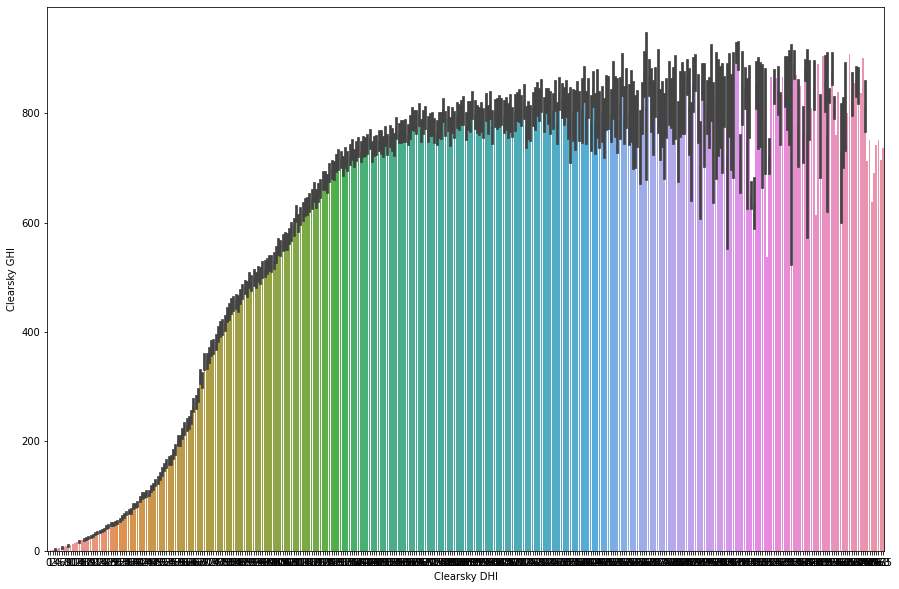

In [11]:
plot_relation('Clearsky DHI', 'Clearsky GHI', df)

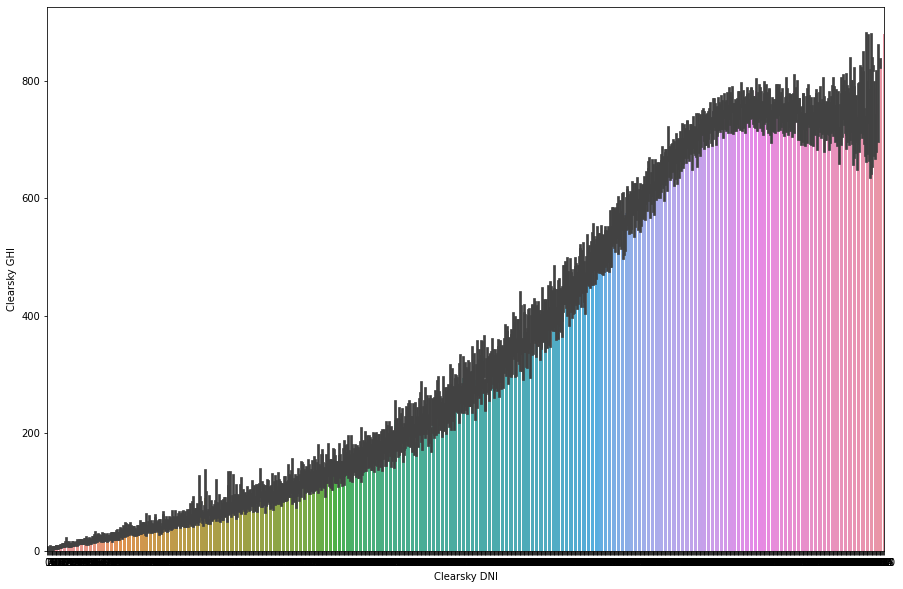

In [12]:
plot_relation('Clearsky DNI', 'Clearsky GHI', df)

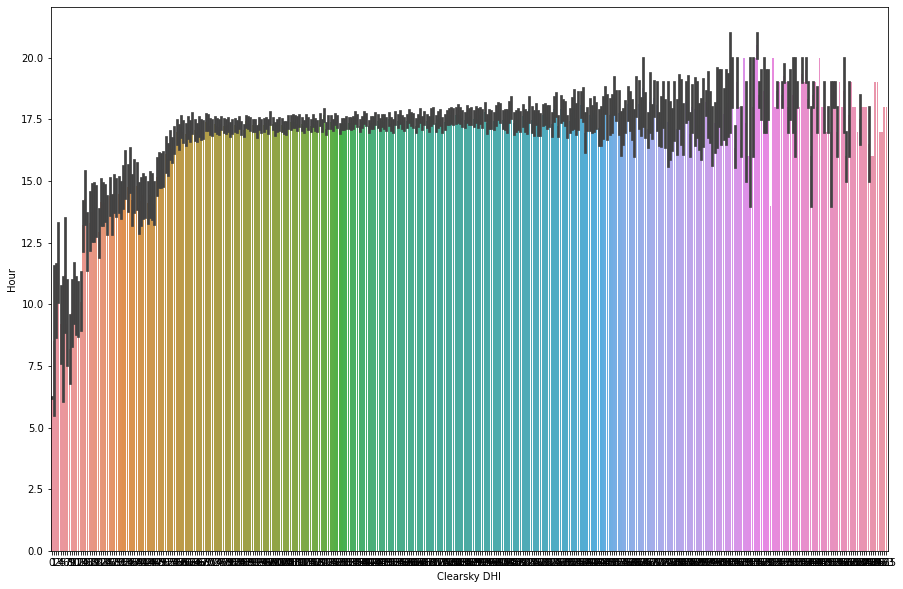

In [13]:
plot_relation('Clearsky DHI', 'Hour', df)

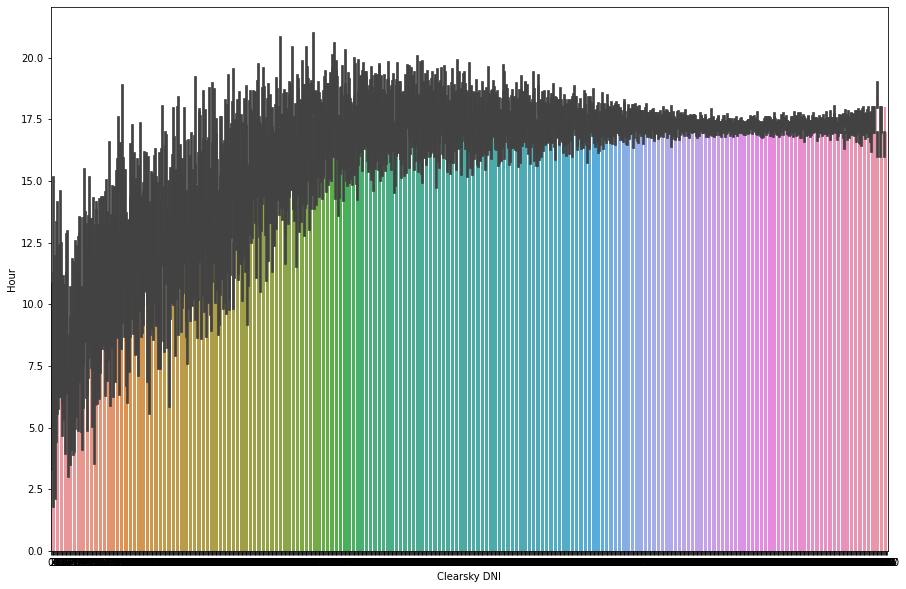

In [14]:
plot_relation('Clearsky DNI', 'Hour', df)

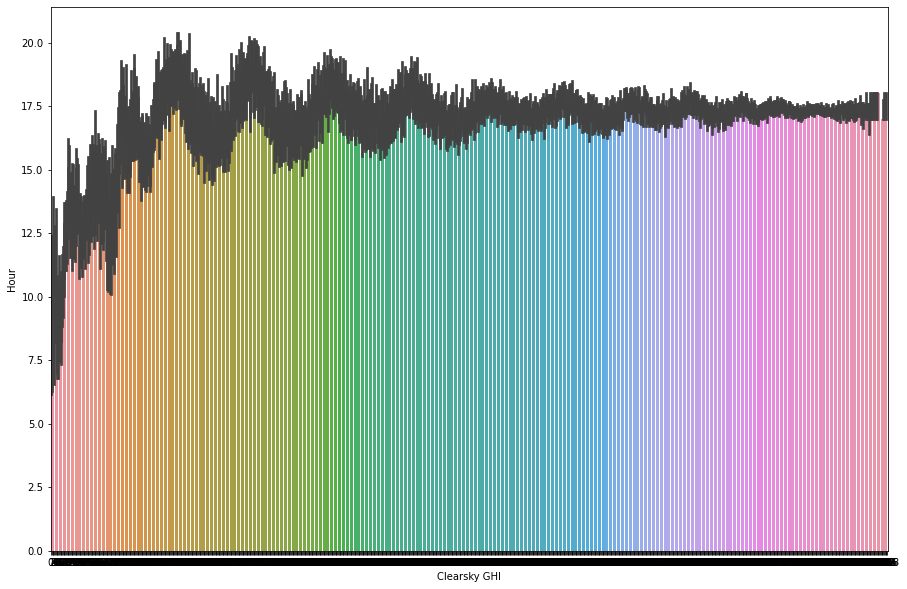

In [15]:
plot_relation('Clearsky GHI', 'Hour', df)

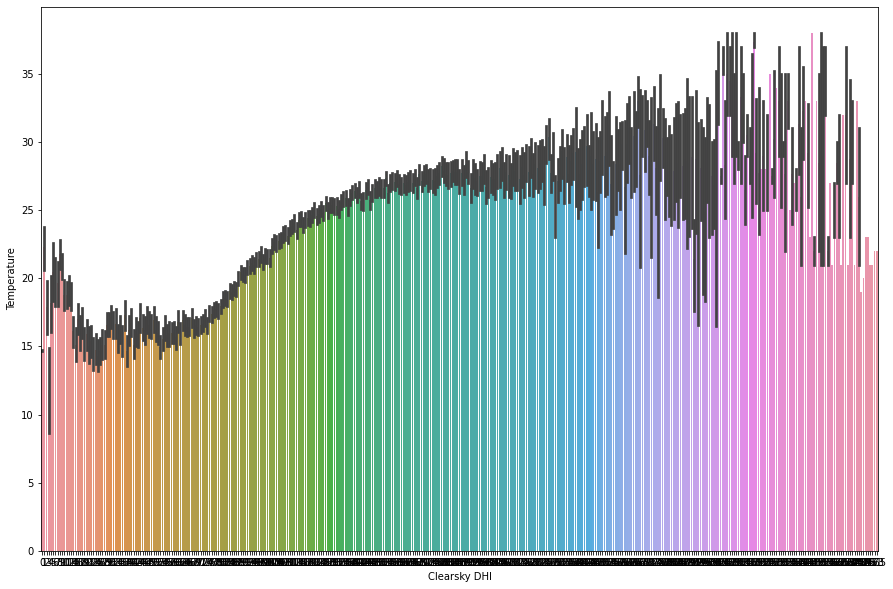

In [16]:
plot_relation('Clearsky DHI', 'Temperature', df)

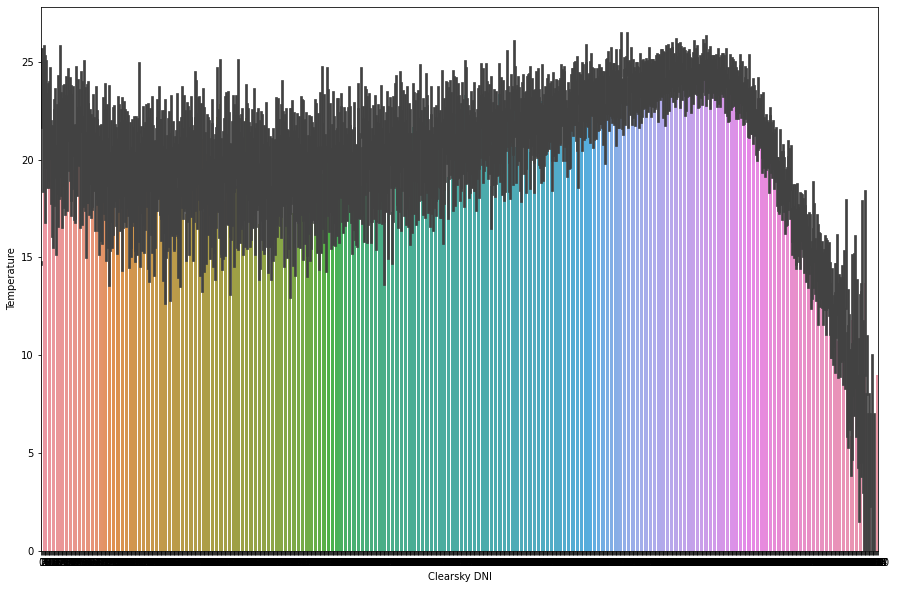

In [17]:
plot_relation('Clearsky DNI', 'Temperature', df)

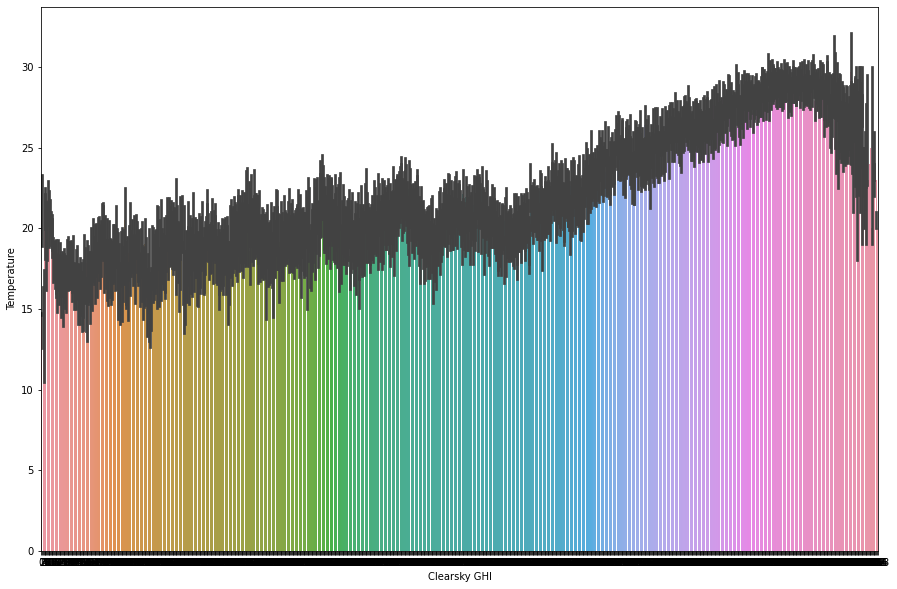

In [18]:
plot_relation('Clearsky GHI', 'Temperature', df)

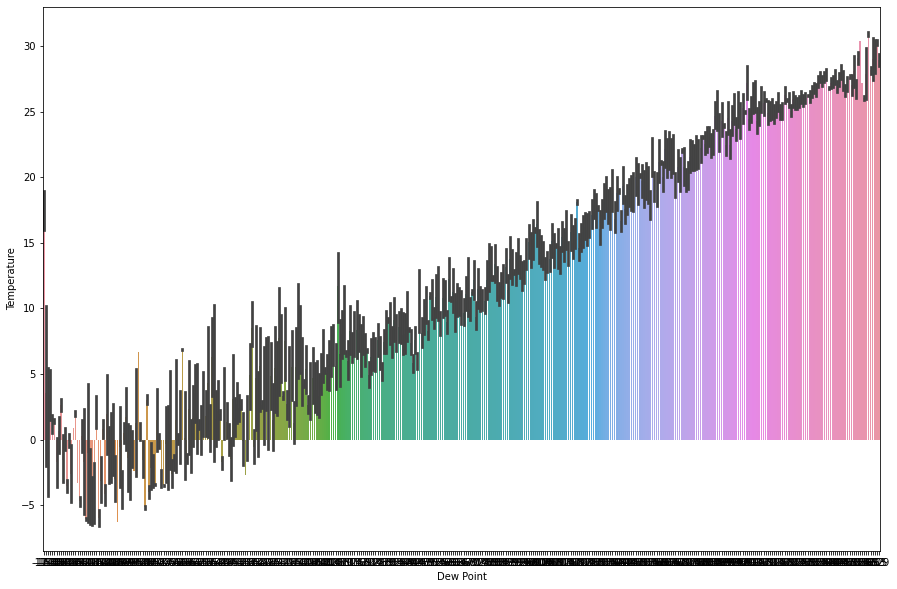

In [19]:
plot_relation('Dew Point', 'Temperature', df)

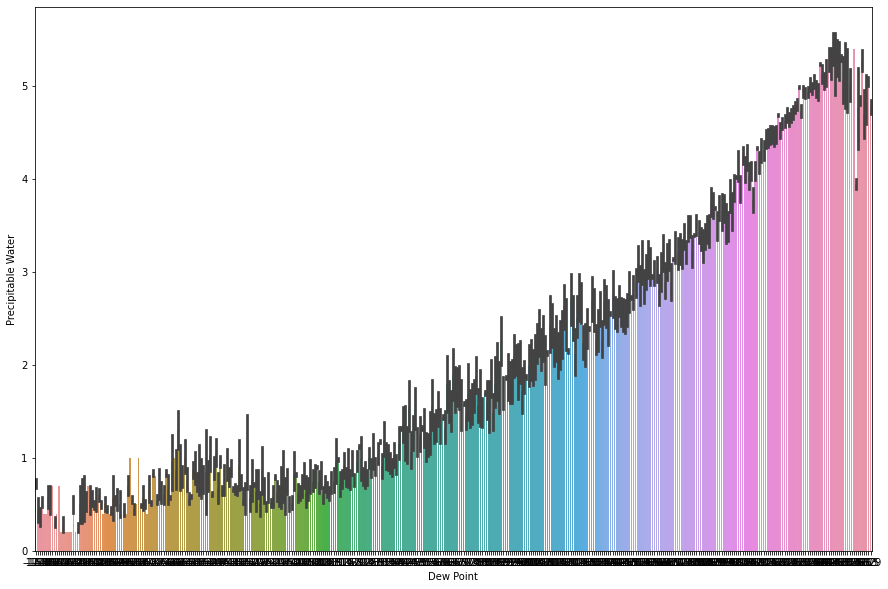

In [20]:
plot_relation('Dew Point', 'Precipitable Water', df)

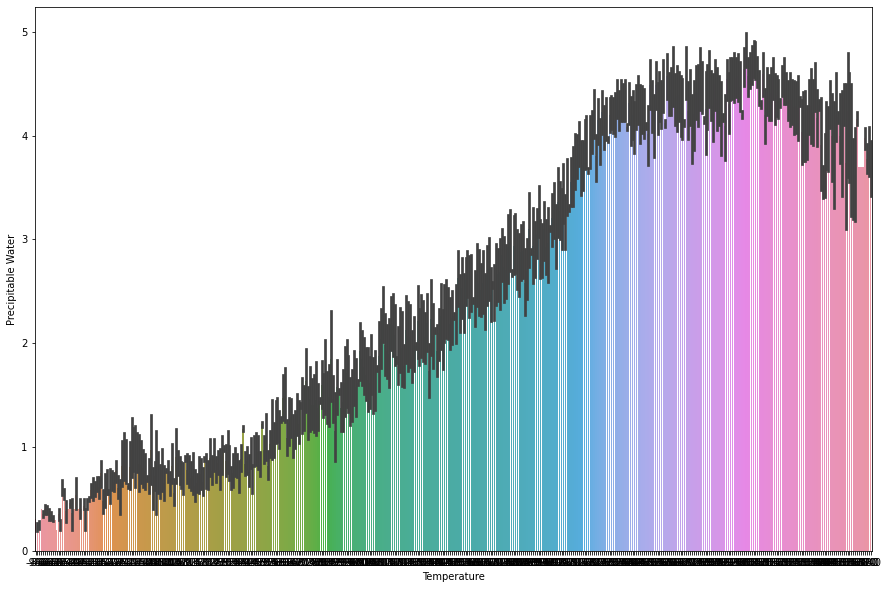

In [21]:
plot_relation('Temperature', 'Precipitable Water', df)

In [22]:
df_train = df[df.Year!=2018]
df_test = df[df.Year==2018]

In [23]:
df_train.sample(10)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
154262,2017,10,19,19,0,118,844,680,0,10.0,28.0,1010,35.08,48.38,1.374,42.8,2.7,0
146305,2017,5,7,0,30,0,0,0,0,9.0,17.0,1000,65.11,92.91,1.425,263.1,3.2,0
15867,2009,11,27,13,30,49,686,204,0,1.0,4.0,1010,81.06,76.97,0.696,293.8,3.1,0
114298,2015,7,10,5,0,0,0,0,3,21.0,25.0,1000,79.60,125.00,4.783,242.9,1.1,0
92807,2014,4,18,11,30,32,55,36,6,11.0,12.0,1010,100.00,85.28,3.757,63.2,4.7,4
26611,2010,7,9,9,30,0,0,0,0,20.0,23.0,1000,83.84,102.90,3.695,255.1,1.8,0
96816,2014,7,11,0,0,50,162,72,6,22.0,25.0,1000,88.10,82.33,4.883,202.8,1.0,4
40049,2011,4,15,8,30,0,0,0,0,11.0,12.0,1000,100.00,121.16,2.045,138.2,2.1,0
821,2009,1,18,2,30,0,0,0,4,-3.0,0.0,1010,78.13,135.03,1.377,179.5,1.5,0
109960,2015,4,10,20,0,165,740,724,7,20.0,26.0,1000,78.29,40.88,4.610,233.7,3.2,0


In [24]:
df_test.sample(10)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
161813,2018,3,26,2,30,0,0,0,7,8.6,10.0,1011,91.13,123.40,3.3,67.0,4.1,0
158571,2018,1,17,13,30,64,343,121,4,-5.6,-1.9,1019,75.71,80.49,1.4,316.0,4.6,100
171937,2018,10,23,0,30,0,0,0,7,11.4,16.2,1012,73.16,110.78,2.0,56.0,1.2,0
170291,2018,9,18,17,30,131,856,871,3,19.6,35.2,1002,40.15,30.16,3.6,277.0,2.2,0
163112,2018,4,22,4,0,0,0,0,7,14.5,15.7,1012,92.30,130.56,2.5,105.0,3.1,0
167536,2018,7,23,8,0,0,0,0,7,20.5,20.5,997,100.00,118.45,3.8,311.0,0.6,0
171889,2018,10,22,0,30,0,0,0,0,3.8,11.4,1012,59.58,110.57,0.7,60.0,1.4,0
162172,2018,4,2,14,0,95,807,527,0,14.7,19.3,1007,74.76,57.64,1.6,250.0,2.6,0
165255,2018,6,5,19,30,161,816,886,7,17.1,26.3,1001,57.10,27.30,2.7,284.0,2.9,0
163110,2018,4,22,3,0,0,0,0,7,14.4,16.5,1012,87.41,122.60,2.5,109.0,4.1,0


# DNI

In [25]:
X_train = df_train.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_train = df_train['Clearsky DNI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_test = df_test['Clearsky DNI'].values

In [26]:
linr = LinearRegression()
clf = linr.fit(X_train, DNI_train)
DNI_pred = clf.predict(X_test)
DNI_pred

array([ 155.82509054,  112.09467605,   87.61352598, ..., -498.16582582,
        356.06983726,  323.65923646])

In [27]:
MSE=mean_squared_error(DNI_test, DNI_pred)
MSE

114893.45885016886

In [28]:
RMSE = np.sqrt(MSE)
RMSE

338.95937640102073

In [29]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, DNI_train)
DNI_pred1 = dtc_clf.predict(X_test)
DNI_pred1

array([ 0,  0,  0, ..., 34,  0,  0])

In [30]:
print(mean_squared_error(DNI_test, DNI_pred1))

3274.24600456621


In [31]:
print(np.sqrt(mean_squared_error(DNI_test, DNI_pred1)))

57.22102764339531


In [32]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DNI_train)
DNI_pred2 = xgbr_clf.predict(X_test)
DNI_pred2

array([-1.5596439, -3.0404794,  1.5277959, ..., 85.38364  ,  3.3316185,
        5.1529756], dtype=float32)

In [33]:
print(mean_squared_error(DNI_test, DNI_pred2))

1608.3886924843612


In [34]:
print(np.sqrt(mean_squared_error(DNI_test, DNI_pred2)))

40.10472157345518


# DHI

In [35]:
X_train = df_train.drop(columns=['Year','Clearsky DHI','Clearsky GHI'])
DHI_train = df_train['Clearsky DHI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
X_test.insert(4, "Clearsky DNI", DNI_pred2)
DHI_test = df_test['Clearsky DHI'].values

In [36]:
linr = LinearRegression()
clf = linr.fit(X_train, DHI_train)
DHI_pred = clf.predict(X_test)
DHI_pred

array([ 10.68056014,   5.60864682,   1.29804891, ..., -75.78160473,
        30.53081913,  27.23988214])

In [37]:
MSE=mean_squared_error(DHI_test, DHI_pred)
MSE

1993.157401402222

In [38]:
RMSE = np.sqrt(MSE)
RMSE

44.644791425229236

In [39]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, DHI_train)
DHI_pred1 = dtc_clf.predict(X_test)
DHI_pred1

array([ 0,  0,  0, ..., 12,  0,  0])

In [40]:
print(mean_squared_error(DHI_test, DHI_pred1))

267.5204908675799


In [41]:
print(np.sqrt(mean_squared_error(DHI_test, DHI_pred1)))

16.356053645900648


In [42]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DHI_train)
DHI_pred2 = xgbr_clf.predict(X_test)
DHI_pred2

array([ 0.0135269 ,  0.01753754,  2.6207738 , ..., 12.059044  ,
        2.700777  ,  3.4080846 ], dtype=float32)

In [43]:
print(mean_squared_error(DHI_test, DHI_pred2))

263.6924300587255


In [44]:
print(np.sqrt(mean_squared_error(DHI_test, DHI_pred2)))

16.238609240286728


# GHI

In [45]:
X_train = df_train.drop(columns=['Year','Clearsky GHI'])
GHI_train = df_train['Clearsky GHI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
X_test.insert(4, "Clearsky DHI", DHI_pred2)
X_test.insert(5,'Clearsky DNI',DNI_pred2)
GHI_test = df_test['Clearsky GHI'].values

In [46]:
linr = LinearRegression()
clf = linr.fit(X_train, GHI_train)
GHI_pred = clf.predict(X_test)
GHI_pred

array([  39.52275701,   32.17736539,   24.69366303, ..., -996.72058867,
        -98.48304064, -102.34745008])

In [47]:
MSE=mean_squared_error(GHI_test, GHI_pred)
MSE

117366.69180650455

In [48]:
RMSE = np.sqrt(MSE)
RMSE

342.58822485092

In [49]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, GHI_train)
GHI_pred1 = dtc_clf.predict(X_test)
GHI_pred1

array([ 0,  0,  3, ..., 14,  3,  3])

In [50]:
print(mean_squared_error(GHI_test, GHI_pred1))

78.23601598173516


In [51]:
print(np.sqrt(mean_squared_error(GHI_test, GHI_pred1)))

8.845112547714425


In [52]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, GHI_train)
GHI_pred2 = xgbr_clf.predict(X_test)
GHI_pred2

array([ 0.02685566,  0.04695784,  2.6834698 , ..., 14.304886  ,
        2.7653058 ,  3.0199983 ], dtype=float32)

In [53]:
print(mean_squared_error(GHI_test, GHI_pred2))

52.79887667061211


In [54]:
print(np.sqrt(mean_squared_error(GHI_test, GHI_pred2)))

7.266283552863328


In [55]:
df_sub = pd.read_csv("data.csv")
df_sub.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI,Latitude,Longitude
0,2011,1,28,12,0,3,13.5,3.2,-23,79.3,-94.45,0.51,189,2.3,0,0,0,0,71,-156.0
1,2011,2,28,12,0,3,13.5,1.2,-21,79.3,-94.45,1.59,189,2.3,0,0,0,0,71,-156.0
2,2011,3,28,12,0,3,13.5,1.3,-21,79.3,-94.45,0.71,189,2.3,0,0,0,0,71,-156.0
3,2011,4,28,12,0,3,13.5,8.3,-18,79.3,-94.45,0.06,189,2.3,0,0,0,0,71,-156.0
4,2011,5,28,12,0,3,13.5,5.3,-5,79.3,-94.45,0.26,189,2.3,0,0,0,0,71,-156.0


In [56]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23812 entries, 0 to 23811
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                23812 non-null  int64  
 1   Month               23812 non-null  int64  
 2   Day                 23812 non-null  int64  
 3   Hour                23812 non-null  int64  
 4   Minute              23812 non-null  int64  
 5   Cloud Type          23812 non-null  int64  
 6   Dew Point           23812 non-null  float64
 7   Temperature         23812 non-null  float64
 8   Pressure            23812 non-null  int64  
 9   Relative Humidity   23812 non-null  float64
 10  Solar Zenith Angle  23812 non-null  float64
 11  Precipitable Water  23812 non-null  float64
 12  Wind Direction      23812 non-null  int64  
 13  Wind Speed          23812 non-null  float64
 14  Fill Flag           23812 non-null  int64  
 15  Clearsky DHI        23812 non-null  int64  
 16  Clea

In [57]:
df_sub.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Latitude              0
Longitude             1
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
df_sub = df_sub.drop(columns=['Clearsky DHI','Clearsky DNI','Clearsky GHI', 'Latitude', 'Longitude'])

In [60]:
df_sub['Pressure'].dtype

dtype('int64')

# Train DNI

In [61]:
X_train = df.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_train = df['Clearsky DNI'].values
X_test = df_sub.drop(columns=['Year'])
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DNI_train)

DNI_pred = xgbr_clf.predict(X_test)
DNI_pred = np.where(DNI_pred<0,0,DNI_pred)

# Train DHI

In [62]:
X_train = df.drop(columns=['Year','Clearsky DHI','Clearsky GHI'])
DHI_train = df['Clearsky DHI'].values
X_test = df_sub.drop(columns=['Year'])
X_test.insert(4, "Clearsky DNI", DNI_pred)
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train,DHI_train)

DHI_pred = xgbr_clf.predict(X_test)
DHI_pred = np.where(DHI_pred<0,0,DHI_pred)

# Train GHI

In [63]:
X_train = df.drop(columns=['Year','Clearsky GHI'])
GHI_train = df['Clearsky GHI'].values
X_test = df_sub.drop(columns=['Year'])
X_test.insert(4, "Clearsky DHI", DHI_pred)
X_test.insert(5,'Clearsky DNI',DNI_pred)
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train,GHI_train)

GHI_pred = xgbr_clf.predict(X_test)
GHI_pred = np.where(GHI_pred<0,0,GHI_pred)

Submit

In [64]:
df_pred = pd.DataFrame([DHI_pred,DNI_pred,GHI_pred]).T
df_pred.columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']
df_pred.to_csv('submission.csv', index=False)

In [65]:
df_sub2 = pd.read_csv("data.csv")
df_sub2.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI,Latitude,Longitude
0,2011,1,28,12,0,3,13.5,3.2,-23,79.3,-94.45,0.51,189,2.3,0,0,0,0,71,-156.0
1,2011,2,28,12,0,3,13.5,1.2,-21,79.3,-94.45,1.59,189,2.3,0,0,0,0,71,-156.0
2,2011,3,28,12,0,3,13.5,1.3,-21,79.3,-94.45,0.71,189,2.3,0,0,0,0,71,-156.0
3,2011,4,28,12,0,3,13.5,8.3,-18,79.3,-94.45,0.06,189,2.3,0,0,0,0,71,-156.0
4,2011,5,28,12,0,3,13.5,5.3,-5,79.3,-94.45,0.26,189,2.3,0,0,0,0,71,-156.0


In [66]:
df_submission = pd.read_csv("submission.csv")
df_submission["Latitude"] = df_sub2["Latitude"]
df_submission["Longitude"] = df_sub2["Longitude"]

In [67]:
df_submission.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Latitude,Longitude
0,219.08719,806.3840,1013.93884,71,-156.0
1,225.41620,755.7638,987.50336,71,-156.0
2,271.39728,722.8686,992.27420,71,-156.0
3,244.72041,771.1033,1007.34406,71,-156.0
4,244.60611,770.5008,1003.50616,71,-156.0


In [68]:
df_submission.to_csv('submission.csv', index=False)

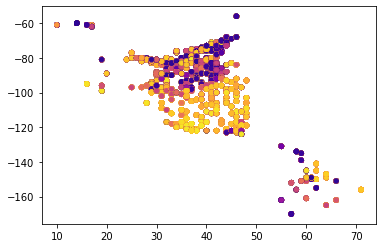

In [69]:
import matplotlib.pyplot as plt
plt.scatter(df_submission['Latitude'], df_submission['Longitude'], s=20, c=df_submission['Clearsky DNI'], cmap='plasma')


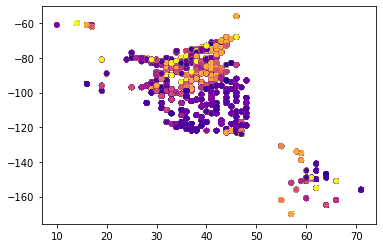

In [70]:
plt.scatter(df_submission['Latitude'], df_submission['Longitude'], s=20, c=df_submission['Clearsky DHI'], cmap='plasma')

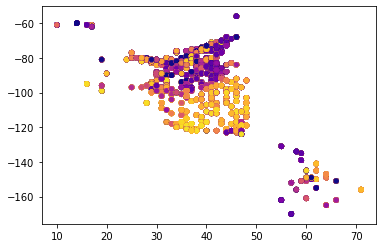

In [71]:
plt.scatter(df_submission['Latitude'], df_submission['Longitude'], s=20, c=df_submission['Clearsky GHI'], cmap='plasma')